In [529]:
#numpy is used numerical computations
import numpy as np

#used to load the csv files
import pandas as pd

#used to plot visualization like corr plot, bar chart etc.
import seaborn as sns
import matplotlib.pyplot as plt


#This library is used to ignore warning
import warnings
warnings.filterwarnings('ignore')

In [531]:
data = pd.read_csv('kddcup99_csv.csv')

In [532]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [535]:
data.shape

(494020, 42)

In [537]:
# describe() function provides insights into the distribution, central tendency, and spread of numerical data.
data.describe

<bound method NDFrame.describe of         duration protocol_type service flag  src_bytes  dst_bytes  land  \
0              0           tcp    http   SF        181       5450     0   
1              0           tcp    http   SF        239        486     0   
2              0           tcp    http   SF        235       1337     0   
3              0           tcp    http   SF        219       1337     0   
4              0           tcp    http   SF        217       2032     0   
...          ...           ...     ...  ...        ...        ...   ...   
494015         0           tcp    http   SF        310       1881     0   
494016         0           tcp    http   SF        282       2286     0   
494017         0           tcp    http   SF        203       1200     0   
494018         0           tcp    http   SF        291       1200     0   
494019         0           tcp    http   SF        219       1234     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0

In [539]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [541]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [624]:
#checking the distribution of category columns
data['service'].value_counts()

service
14    281400
45    110893
22     64292
50      9723
40      7237
       ...  
1         11
58         7
41         1
57         1
46         1
Name: count, Length: 66, dtype: int64

In [545]:
data.describe(include=['object'])

,protocol_type,service,flag,label
count,494020,494020,494020,494020
unique,3,66,11,23
top,icmp,ecr_i,SF,smurf
freq,283602,281400,378439,280790


In [622]:
data['label'].value_counts()

label
18    280790
9     107201
11     97277
0       2203
17      1589
5       1247
15      1040
21      1020
20       979
14       264
10       231
3         53
1         30
6         21
22        20
4         12
16        10
7          9
2          8
8          7
13         4
12         3
19         2
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of taget label')

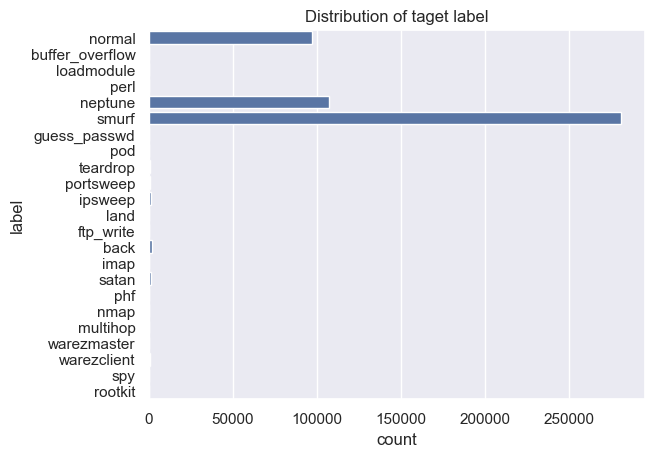

In [482]:
sns.countplot(data["label"])
plt.title("Distribution of taget label")

In [484]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Define oversampler
oversampler = RandomOverSampler(random_state=42)

# Separate features (X) and target (y)
X = data.drop('label', axis=1)  # Features
y = data['label']  # Target column

# Apply oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Concatenate resampled features and target
data_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame({'label': y_resampled})], axis=1)

# Check the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(data_resampled['label'].value_counts())



Class distribution after oversampling:
label
normal             280790
ftp_write          280790
spy                280790
warezclient        280790
warezmaster        280790
multihop           280790
nmap               280790
phf                280790
satan              280790
imap               280790
back               280790
land               280790
buffer_overflow    280790
ipsweep            280790
portsweep          280790
teardrop           280790
pod                280790
guess_passwd       280790
smurf              280790
neptune            280790
perl               280790
loadmodule         280790
rootkit            280790
Name: count, dtype: int64


In [485]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


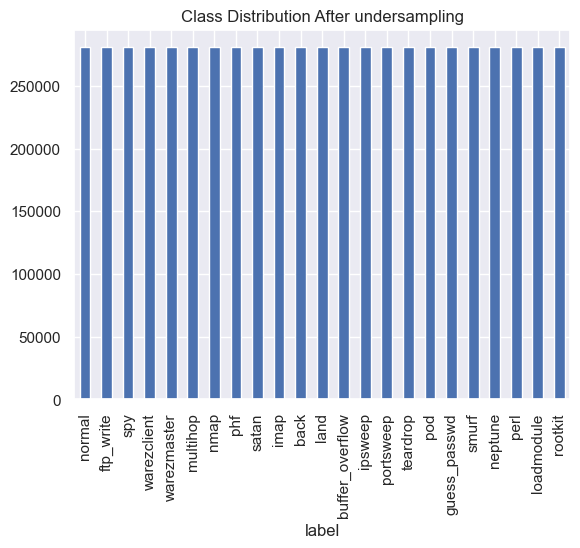

In [486]:
data_resampled['label'].value_counts().plot(kind="bar")
plt.title("Class Distribution After undersampling")
plt.show()

In [487]:
data.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [488]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

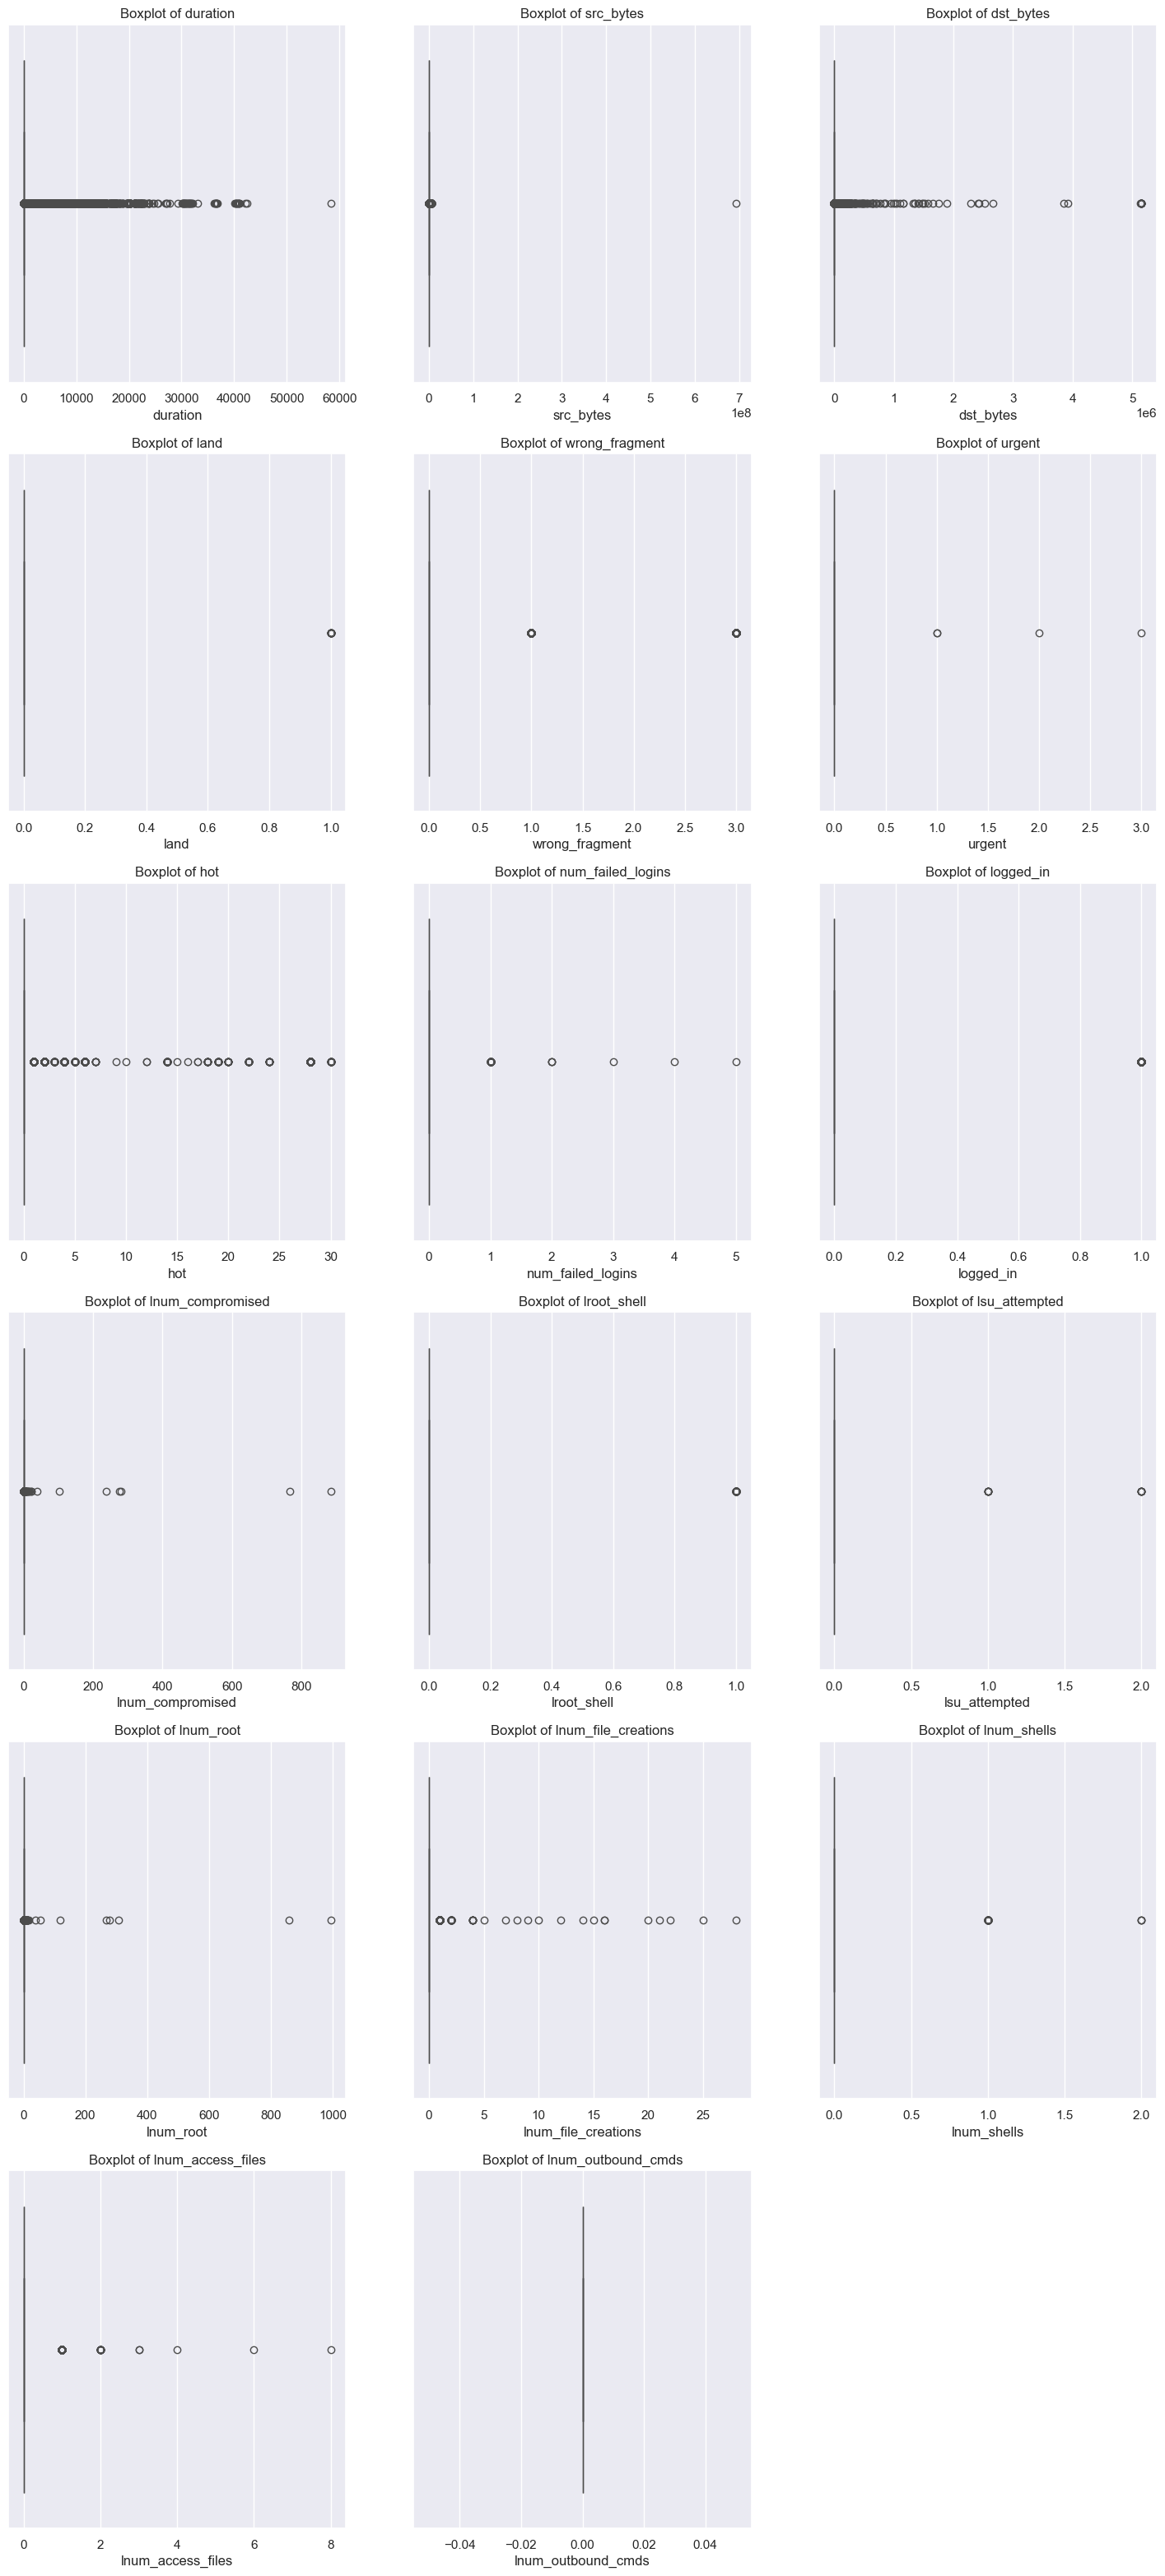

In [489]:
num_cols=data.select_dtypes(include=int)

plt.figure(figsize=(18,18))
for i,j in zip(range(1, 18),num_cols):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

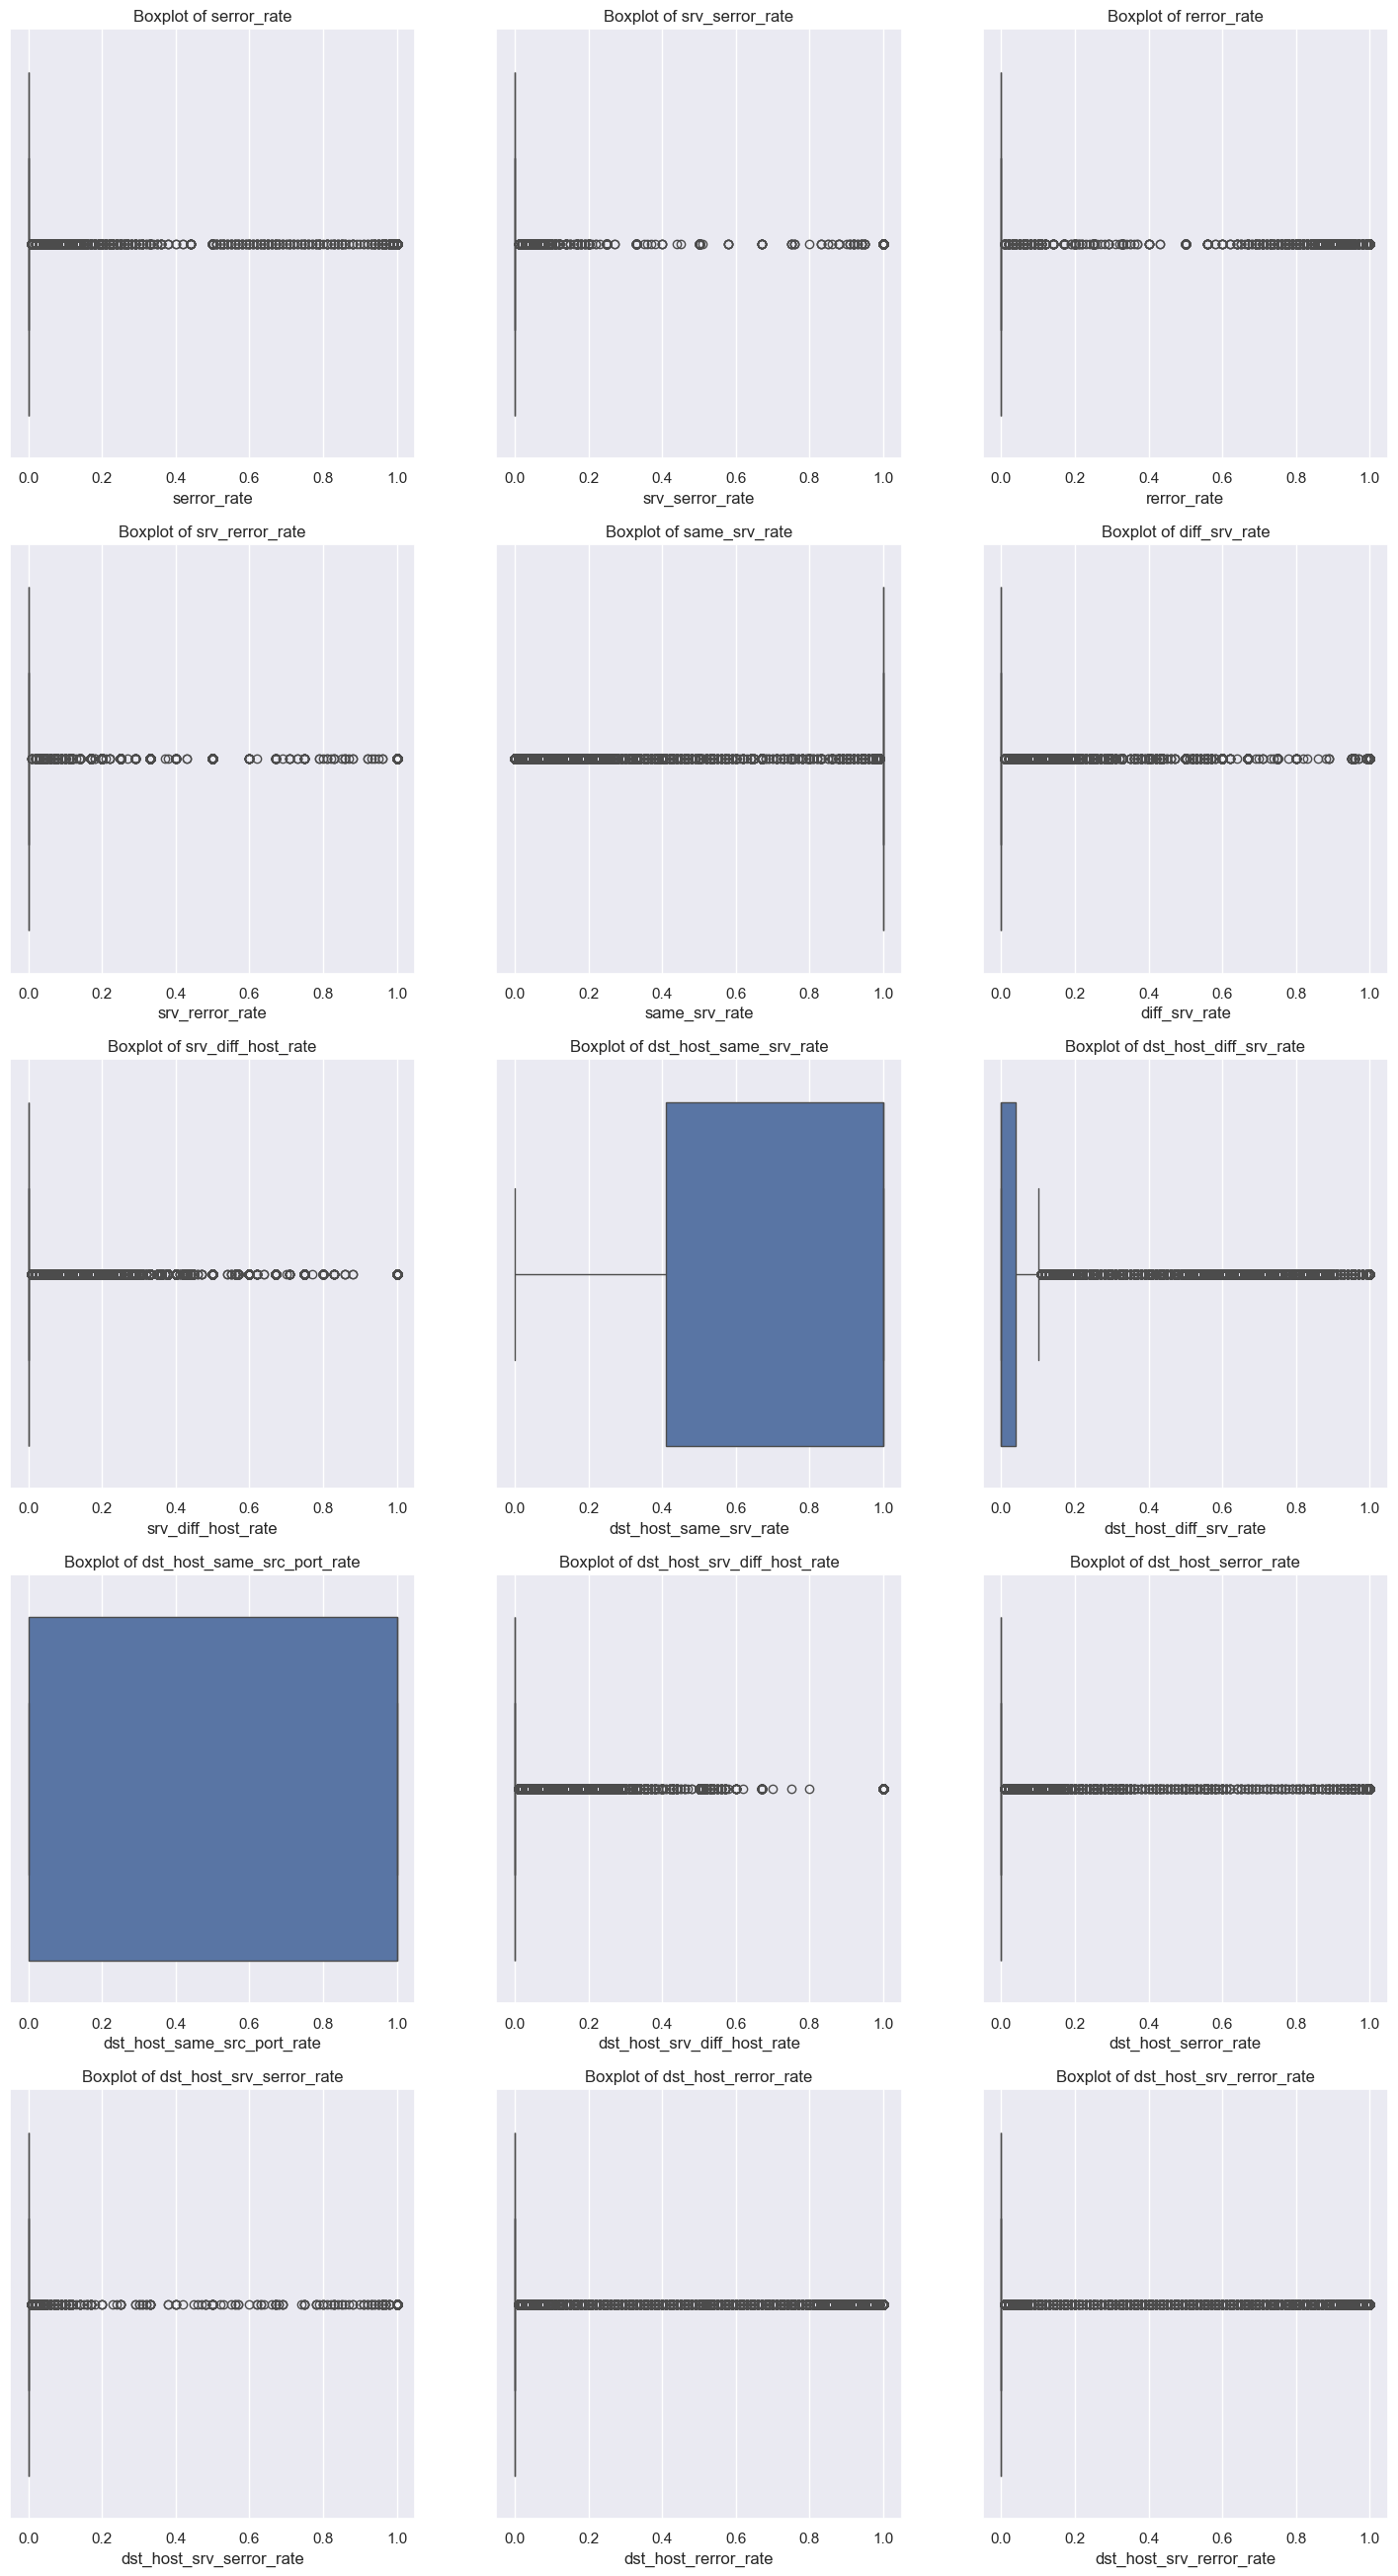

In [490]:
float_cols=data.select_dtypes(include=float)

plt.figure(figsize=(18,18))
for i,j in zip(range(1, 18),float_cols):
    plt.subplot(6, 3, i)
    plt.subplots_adjust(right=0.9,top=1.8)
    sns.boxplot(data=data, x=j)
    sns.set_theme()
    plt.title('Boxplot of {}'.format(j))

In [491]:
print(len(data[data.duplicated()]))

348435


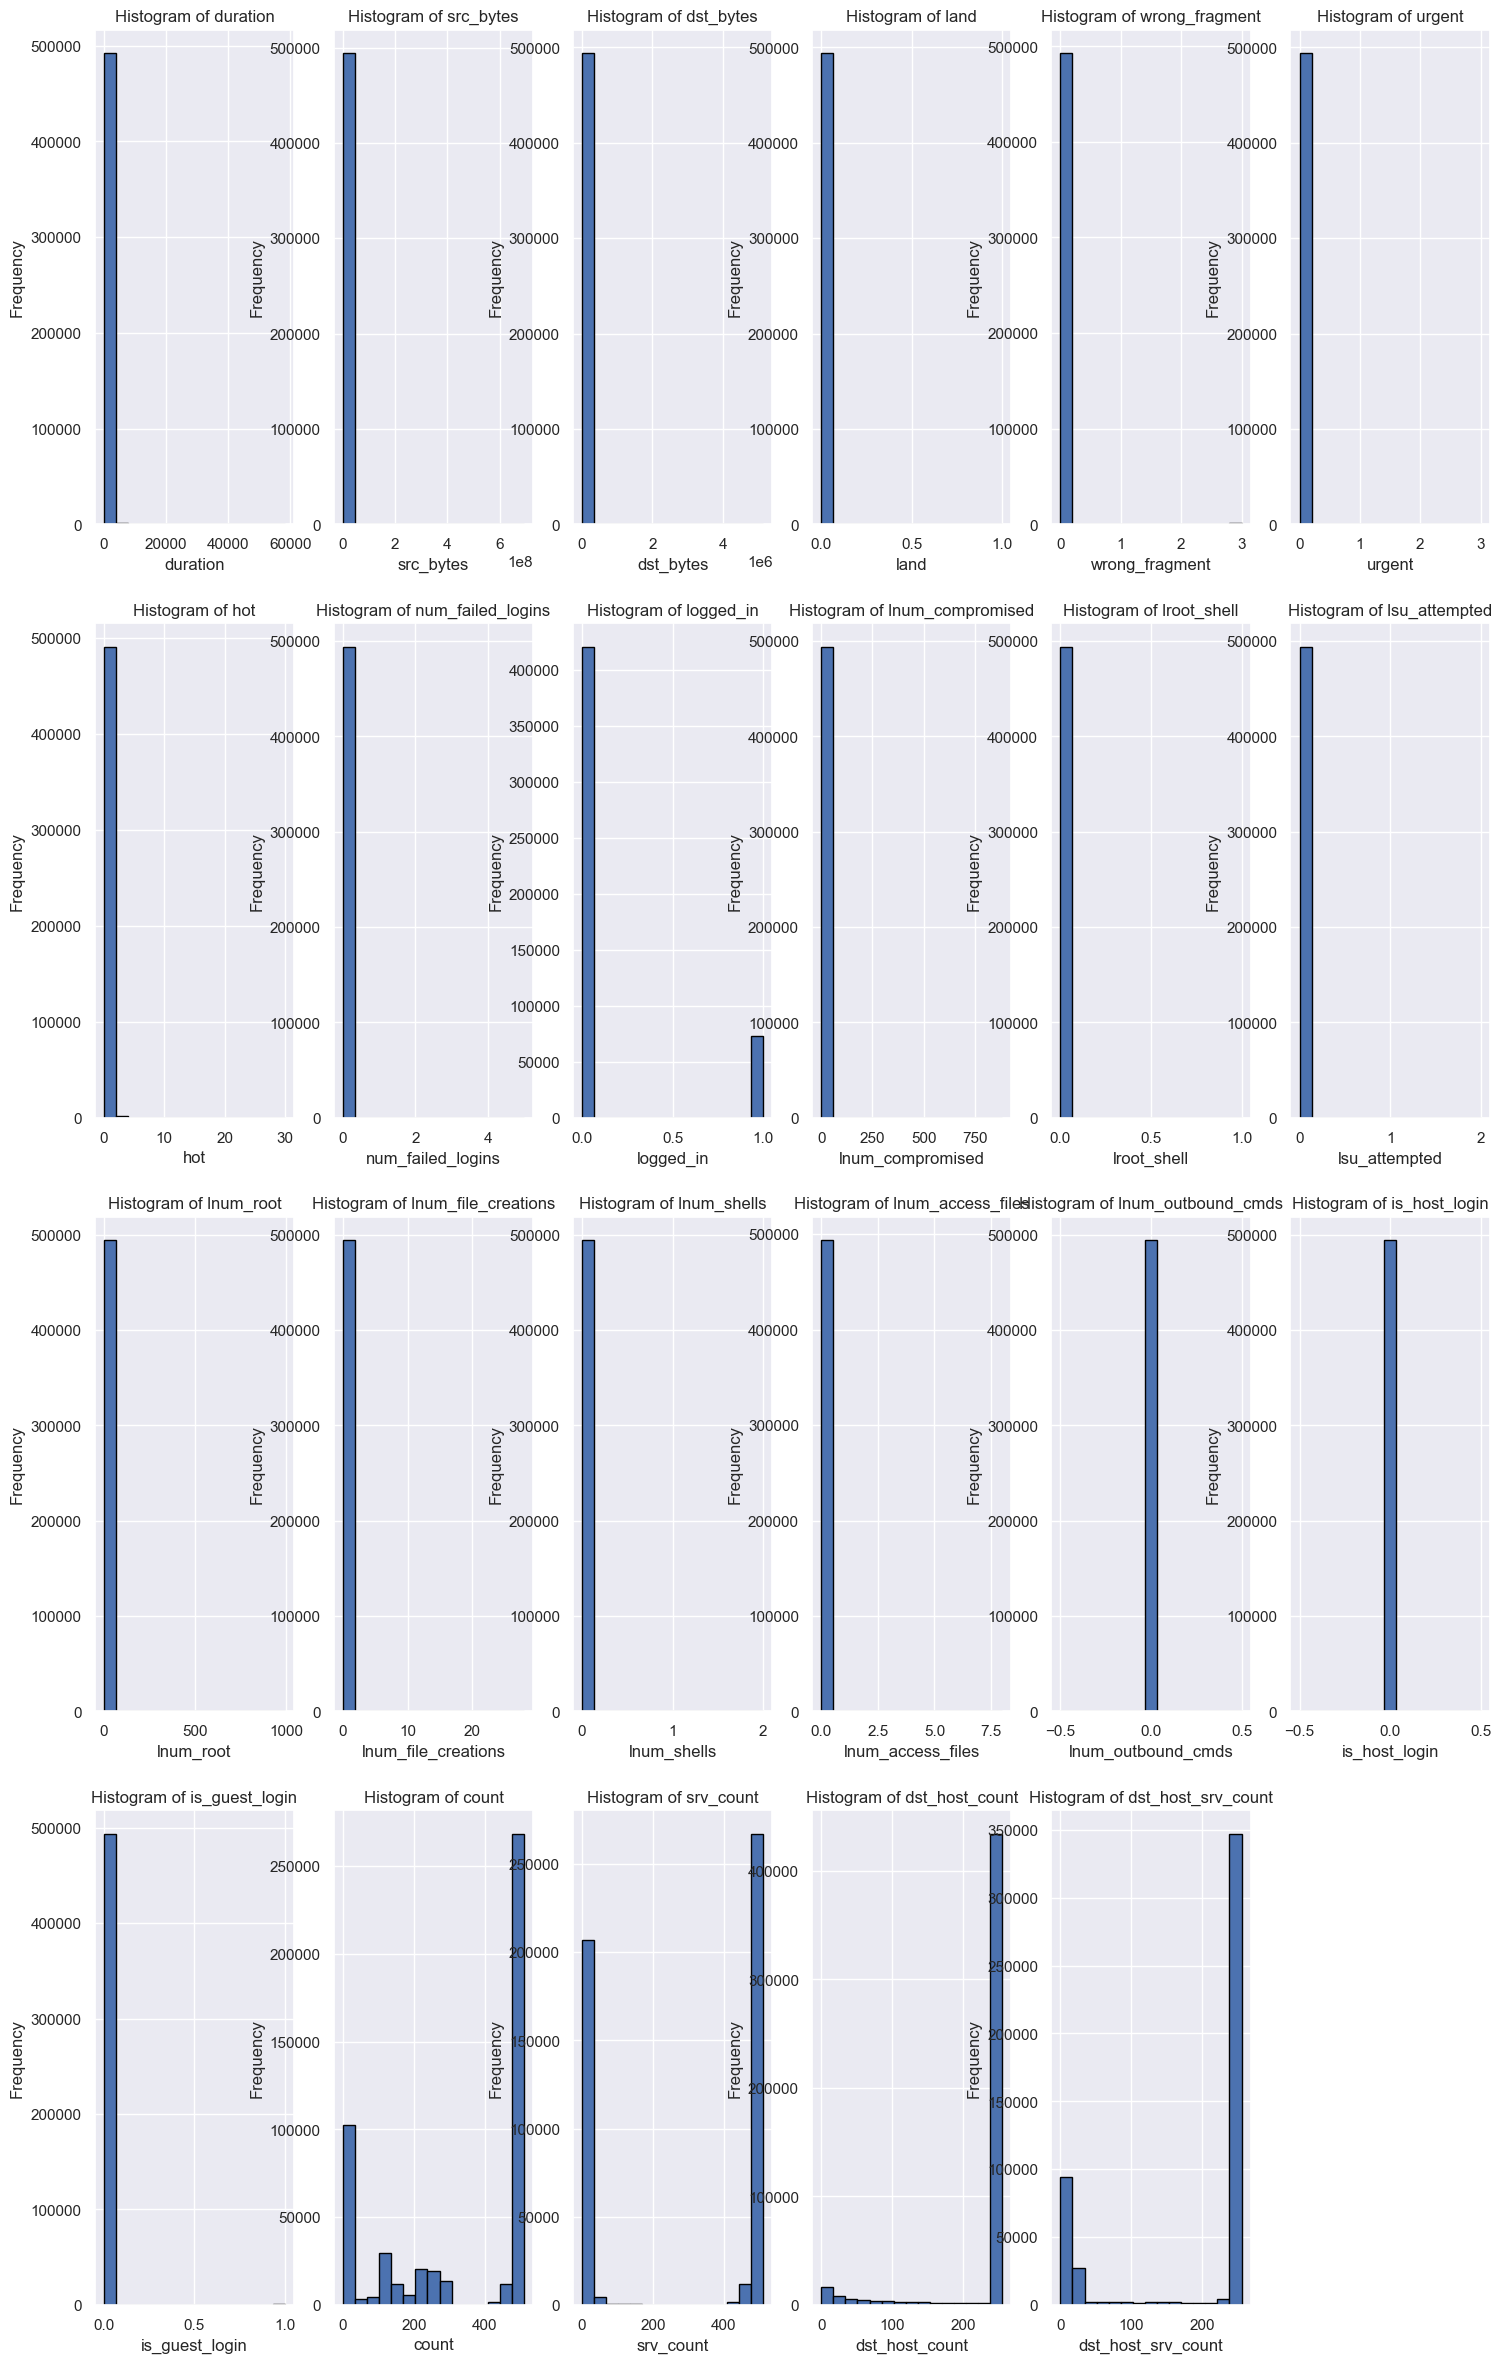

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'num_cols' contains the numeric columns in your dataset
num_cols = data.select_dtypes(include=int).columns  # or float if needed

# Set the figure size
plt.figure(figsize=(18, 24))  # Adjust figure size to fit all the plots

# Create subplots (e.g., 7 rows and 6 columns to fit 42 plots)
for i, j in zip(range(1, len(num_cols) + 1), num_cols):
    plt.subplot(7, 6, i)  # 7 rows and 6 columns grid
    plt.subplots_adjust(right=0.9, top=1.8)
    plt.hist(data[j], bins=15, edgecolor='black')
    plt.title(f'Histogram of {j}')
    plt.xlabel(j)
    plt.ylabel('Frequency')

# Save the figure
plt.savefig('Histograms.png')
plt.show()




In [508]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))  # Get the number of unique classes

# Convert labels to one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_test_encoded = to_categorical(y_test, num_classes=num_classes)

print("y_train_encoded shape:", y_train_encoded.shape)
print("y_test_encoded shape:", y_test_encoded.shape)


y_train_encoded shape: (116468, 23)
y_test_encoded shape: (29117, 23)


In [568]:
import pandas as pd  

X_new = pd.get_dummies(X_new, columns=categorical_cols)  # One-hot encode categorical columns


In [570]:
for col in data.columns:
    if(data[col].dtype == 'object'):
        data[col]= data[col].astype('category')
        data[col] = data[col].cat.codes

In [572]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix

def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f1: {}".format(f1_score(true_value, pred)))

In [574]:
def classification_rep(y_train_encoded, X_train, model):
    probs = np.array([x[-1] for x in model.predict_proba(X_train)])
    print('The roc_auc score is {}'.format(roc_auc_score(y_train_encoded, probs).round(4)))
    print('confusion matrix:')
    print(confusion_matrix(y_train_encoded, model.predict(X_train)))
    print('classification report:')
    print(classification_report(y_train, model.predict(X_train)))

In [576]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Extract labels and features
y_new = data['label']  
X_new = data.drop(labels='label', axis=1)  

# Encode labels (convert to numerical if needed)
y_new = y_new.astype('category').cat.codes  # Convert string labels to numeric codes

# One-hot encode the labels
num_classes = len(np.unique(y_new))  # Get the number of unique classes
y_new_encoded = to_categorical(y_new, num_classes=num_classes)

print("X_new shape:", X_new.shape)  # Features
print("y_new_encoded shape:", y_new_encoded.shape)  # Encoded labels



X_new shape: (494020, 41)
y_new_encoded shape: (494020, 23)


In [597]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_new, y_new_encoded, test_size = 0.2, random_state = 42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [598]:
#Neural_network

In [601]:
!pip install keras
!pip install tensorflow
import keras
import tensorflow as tf


model = keras.Sequential([ # sequential help us to initialize our neural network
                          keras.layers.Flatten(input_shape=(41,)), #input layer
                          keras.layers.Dense(32, activation=tf.nn.relu), #hidden layer
   	                      keras.layers.Dense(32, activation=tf.nn.relu), # second hidden layer
                          keras.layers.Dense(3, activation=tf.nn.softmax), #output layer
]) # softmax- for multiclass

In [602]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 41 input features
    Dense(32, activation='relu'),
    Dense(23, activation='softmax')  # Output layer for 65 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9882 - loss: 0.0879 - val_accuracy: 0.9988 - val_loss: 0.0063
Epoch 2/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9986 - val_loss: 0.0069
Epoch 3/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9991 - val_loss: 0.0051
Epoch 4/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9991 - loss: 0.0037 - val_accuracy: 0.9990 - val_loss: 0.0070
Epoch 5/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9988 - val_loss: 0.0051
Epoch 6/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9991 - loss: 0.0033 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 7/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 8/10
11116/11116 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 

In [605]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #categorical_crossentropy, sparse_categorical_crossentropy
              metrics=['accuracy'])

In [607]:
test_loss, test_acc = model.evaluate(X_test, y_test_encoded)


3088/3088 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9989 - loss: 0.0098


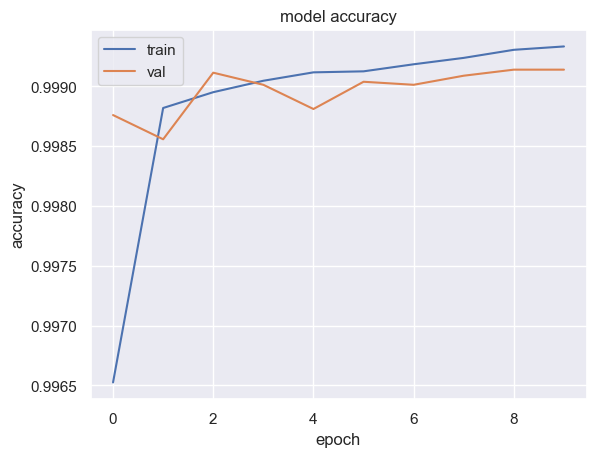

In [609]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

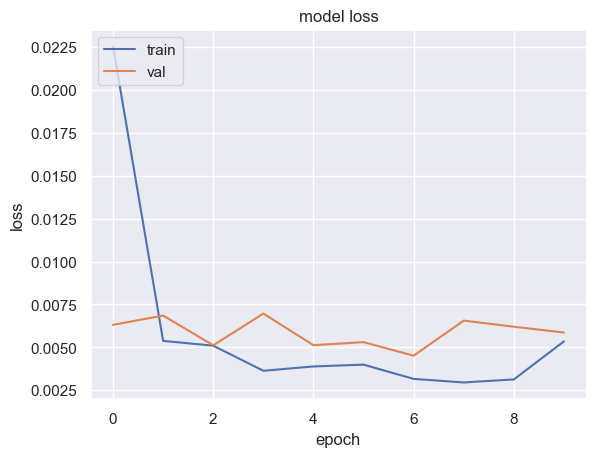

In [611]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [615]:
num_classes = len(np.unique(y_train))
print("Total number of classes:", num_classes)


Total number of classes: 23


In [628]:
print("y_train shape:", y_train_encoded.shape)
print("y_test shape:", y_test_encoded.shape)


y_train shape: (116468, 23)
y_test shape: (29117, 23)
